In [ ]:
import pandas as pd
import numpy as np

path = "student_habits_performance.csv"

#дані
df = pd.read_csv(path)
df = df.dropna(subset=['gender', 'attendance_percentage'])
df_filtered = df[df['gender'].isin(['Male', 'Female'])].copy()

#Розділення 
male_data = df_filtered[df_filtered['gender'] == 'Male']
female_data = df_filtered[df_filtered['gender'] == 'Female']

#Вибірка по 50 
np.random.seed(42)
sample_size = 40
if len(male_data) >= sample_size and len(female_data) >= sample_size:
    male_sample = male_data.sample(n=sample_size, random_state=42)
    female_sample = female_data.sample(n=sample_size, random_state=42)
else:
    print(f"Помилка.")
    male_sample = male_data
    female_sample = female_data

group1 = male_sample['attendance_percentage']
group2 = female_sample['attendance_percentage']

In [20]:
from scipy.stats import shapiro

#Перевірка на нормальність 
print("\nПеревірка на нормальність розподілу(ориг дані):")
stat_male, p_male = shapiro(group1)
stat_female, p_female = shapiro(group2)

print(f"Чоловіки: статистика={stat_male:.3f}, p-значення={p_male:.3f}")
print(f"Жінки: статистика={stat_female:.3f}, p-значення={p_female:.3f}")
if p_male > 0.05:
    print("Розподіл для чоловіків нормальний(не відхиляємо H0).")
else:
    print("Розподіл для чоловіків НЕ нормальний(відхиляємо H0).")
if p_female > 0.05:
    print("Розподіл для жінок нормальний(не відхиляємо H0).")
else:
    print("Розподіл для жінок НЕ нормальний(відхиляємо H0).")


Перевірка на нормальність розподілу(ориг дані):
Чоловіки: статистика=0.957, p-значення=0.130
Жінки: статистика=0.973, p-значення=0.444
Розподіл для чоловіків нормальний(не відхиляємо H0).
Розподіл для жінок нормальний(не відхиляємо H0).


In [21]:
# Характеристика 
print("\nХарактеристика груп (оригінальні дані):")
print(f"Чоловіки: Кількість={len(group1)}, Середнє={group1.mean():.2f}, Станд. відхилення={group1.std():.2f}")
print(f"Жінки: Кількість={len(group2)}, Середнє={group2.mean():.2f}, Станд. відхилення={group2.std():.2f}")


Характеристика груп (оригінальні дані):
Чоловіки: Кількість=40, Середнє=83.57, Станд. відхилення=10.67
Жінки: Кількість=40, Середнє=83.31, Станд. відхилення=10.08


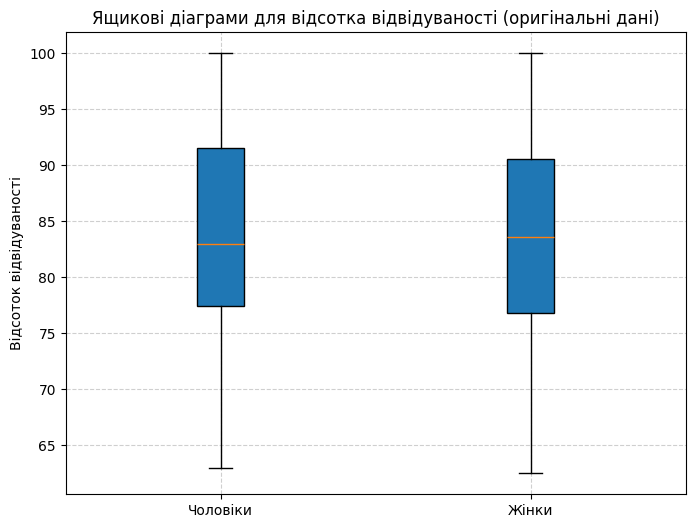

In [22]:
import matplotlib.pyplot as plt

#box plot
plt.figure(figsize=(8, 6))
plt.boxplot([group1, group2], tick_labels=['Чоловіки', 'Жінки'], patch_artist=True)
plt.title('Ящикові діаграми для відсотка відвідуваності (оригінальні дані)')
plt.ylabel('Відсоток відвідуваності')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [23]:
#гіпотези
print("\nГіпотези(ориг дані):")
print("H0:Середні значення відсотка відвідуваності для чоловіків і жінок рівні.")
print("H1:Середні значення відсотка відвідуваності для чоловіків і жінок відрізняються.")


Гіпотези(ориг дані):
H0:Середні значення відсотка відвідуваності для чоловіків і жінок рівні.
H1:Середні значення відсотка відвідуваності для чоловіків і жінок відрізняються.


In [24]:
from scipy.stats import ttest_ind, mannwhitneyu

# Перевірка гіпотези
if p_male > 0.05 and p_female > 0.05:
    print("\nВиконуємо t-тест для незалежних вибірок:")
    t_stat, p_value = ttest_ind(group1, group2)
    test_name = "t-тест"


print(f"Статистика {test_name}: {t_stat:.3f}")
print(f"p-значення: {p_value:.3f}")

# Висновки
if p_value < 0.05:
    print("Відхиляємо H0:Є статистично значуща різниця між середніми значеннями.")
else:
    print("Не відхиляємо H0:Немає статистично значущої різниці між середніми значеннями.")


Виконуємо t-тест для незалежних вибірок:
Статистика t-тест: 0.114
p-значення: 0.909
Не відхиляємо H0:Немає статистично значущої різниці між середніми значеннями.


<h1>Модифіковані дані(ЗАЛЕЖНІСТЬ, ПОМНОЖЕНА НА 1-5)<h1>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_rel

# 1.дані
path = "V:/seconnndddd/student_habits_performance.csv"
df = pd.read_csv(path)
df = df.dropna(subset=['attendance_percentage'])

#Вип вибірка
np.random.seed(42)
sample_size = 40
sample = df.sample(n=sample_size, random_state=42).copy()

# Група до(ориг значення)
before = sample['attendance_percentage'].values

# Група після(модиф значення)
sample['attendance_percentage_modified'] = before * np.random.uniform(1, 6, size=sample_size)
after = sample['attendance_percentage_modified'].values


In [44]:
# 2. Перевірка нормальності різниці
diff = after - before
stat_shapiro, p_shapiro = shapiro(diff)
print("Перевірка нормальності різниці:")
print(f"Статистика = {stat_shapiro:.3f}, p-значення = {p_shapiro:.3f}")
if p_shapiro > 0.05:
    print("Різниця має нормальний розподіл(не відхиляємо H0).")
else:
    print("Різниця НЕ має нормального розподілу(відхиляємо H0).")


Перевірка нормальності різниці:
Статистика = 0.949, p-значення = 0.071
Різниця має нормальний розподіл(не відхиляємо H0).


In [45]:
# 3. Характеристика груп
print("\nХарактеристики вибірок:")
print(f"До:Кількість={len(before)}, Середнє={np.mean(before):.2f}, Std={np.std(before, ddof=1):.2f}")
print(f"Після:Кількість={len(after)}, Середнє={np.mean(after):.2f}, Std={np.std(after, ddof=1):.2f}")



Характеристики вибірок:
До:Кількість=40, Середнє=82.75, Std=8.68
Після:Кількість=40, Середнє=273.35, Std=130.01


C:\Users\ilkiv\AppData\Local\Temp\ipykernel_31672\4205071550.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before, after], labels=['До', 'Після'], patch_artist=True,


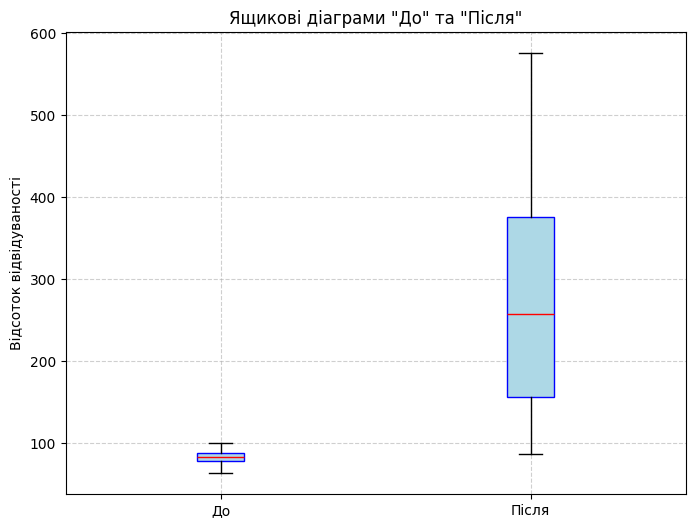

In [46]:
# 4. Візуалізація ящикових діаграм
plt.figure(figsize=(8, 6))
plt.boxplot([before, after], labels=['До', 'Після'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Ящикові діаграми "До" та "Після"')
plt.ylabel('Відсоток відвідуваності')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [47]:
# 5. Гіпотези
print("\nГіпотези:")
print("Не відхиляємо H0:Різниця між до та після не є статистично значущою.")
print("Відхиляємо H0:Є статистично значуща різниця між до та після.")



Гіпотези:
Не відхиляємо H0:Різниця між до та після не є статистично значущою.
Відхиляємо H0:Є статистично значуща різниця між до та після.


In [48]:
# 6. Парний t-тест
t_stat, p_val = ttest_rel(before, after)
print(f"\nРезультати парного t-тесту:")
print(f"t-статистика = {t_stat:.3f}")
print(f"p-значення = {p_val:.3f}")

if p_val < 0.05:
    print("Відхиляємо H0:Є статистично значуща різниця між до та після.")
else:
    print("Не відхиляємо H0:Різниця між до та після не є статистично значущою.")



Результати парного t-тесту:
t-статистика = -9.484
p-значення = 0.000
Відхиляємо H0:Є статистично значуща різниця між до та після.


<h1>7.Порівняємо кількісну змінну з оригінального дата сету та згенеровану змінну <h1>


Перевірка на нормальність(згенеровані дані):
Чоловіки: статистика=0.935, p-значення=0.065
Жінки: статистика=0.966, p-значення=0.427
Розподіл для чоловіків нормальний.
Розподіл для жінок нормальний.

Характеристика груп (згенеровані дані):
Чоловіки:Кількість=30, Середнє=210.43, Станд. відхилення=105.78
Жінки:Кількість=30, Середнє=234.67, Станд. відхилення=107.24


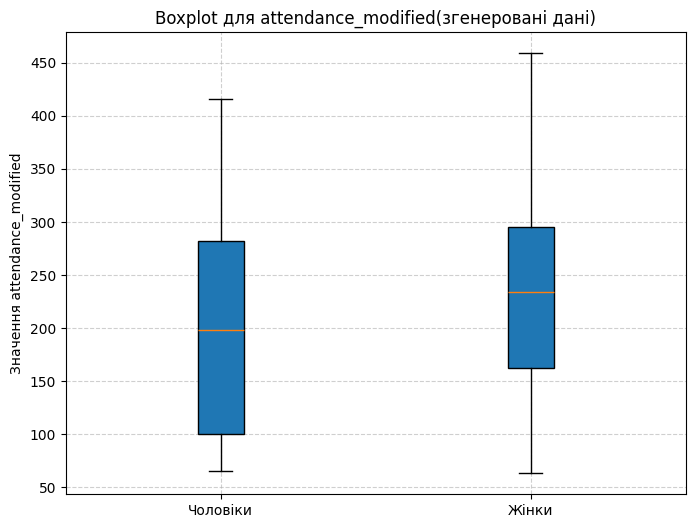


Гіпотези(згенеровані дані):
H0: Середні значення змінної однакові для чоловіків і жінок.
H1: Вони відрізняються.
Виконуємо t-тест:
Статистика = -0.881
p-значення = 0.382
Не відхиляємо H0:статистично значущої різниці немає.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, mannwhitneyu


path = "V:/seconnndddd/student_habits_performance.csv"
df = pd.read_csv(path)

#Очищення
df = df.dropna(subset=['gender', 'attendance_percentage'])
df_filtered = df[df['gender'].isin(['Male', 'Female'])].copy()


np.random.seed(42)
df_filtered['attendance_modified'] = df_filtered['attendance_percentage'] * np.random.randint(1, 6, size=len(df_filtered))

#Розділення по статі
male_data = df_filtered[df_filtered['gender'] == 'Male']
female_data = df_filtered[df_filtered['gender'] == 'Female']

#Вибірка по 30
sample_size = 30
if len(male_data) >= sample_size and len(female_data) >= sample_size:
    male_sample = male_data.sample(n=sample_size, random_state=42)
    female_sample = female_data.sample(n=sample_size, random_state=42)
else:
    print("Помилка.")


#Згенеровані змінні по групах
group1_mod = male_sample['attendance_modified']
group2_mod = female_sample['attendance_modified']

#Перевірка на нормальність
print("\nПеревірка на нормальність(згенеровані дані):")
stat_m_mod, p_m_mod = shapiro(group1_mod)
stat_f_mod, p_f_mod = shapiro(group2_mod)

print(f"Чоловіки: статистика={stat_m_mod:.3f}, p-значення={p_m_mod:.3f}")
print(f"Жінки: статистика={stat_f_mod:.3f}, p-значення={p_f_mod:.3f}")

if p_m_mod > 0.05:
    print("Розподіл для чоловіків нормальний.")
else:
    print("Розподіл для чоловіків НЕ нормальний.")
if p_f_mod > 0.05:
    print("Розподіл для жінок нормальний.")
else:
    print("Розподіл для жінок НЕ нормальний.")

#Характеристика
print("\nХарактеристика груп (згенеровані дані):")
print(f"Чоловіки:Кількість={len(group1_mod)}, Середнє={group1_mod.mean():.2f}, Станд. відхилення={group1_mod.std():.2f}")
print(f"Жінки:Кількість={len(group2_mod)}, Середнє={group2_mod.mean():.2f}, Станд. відхилення={group2_mod.std():.2f}")

#Візуалізація
plt.figure(figsize=(8, 6))
plt.boxplot([group1_mod, group2_mod], tick_labels=['Чоловіки', 'Жінки'], patch_artist=True)
plt.title('Boxplot для attendance_modified(згенеровані дані)')
plt.ylabel('Значення attendance_modified')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#гіпотези
print("\nГіпотези(згенеровані дані):")
print("H0: Середні значення змінної однакові для чоловіків і жінок.")
print("H1: Вони відрізняються.")


if p_m_mod > 0.05 and p_f_mod > 0.05:
    t_stat_mod, p_val_mod = ttest_ind(group1_mod, group2_mod)
    print("Виконуємо t-тест:")


print(f"Статистика = {t_stat_mod:.3f}")
print(f"p-значення = {p_val_mod:.3f}")

if p_val_mod < 0.05:
    print("Відхиляємо H0:є статистично значуща різниця.")
else:
    print("Не відхиляємо H0:статистично значущої різниці немає.")


<h1>Звіт<h1>
<h1>В цьому практикумі ми використали критерій Стьюдента рівності середніх для вибірок. Перевіряли нормальність, візуалізували оригінальні і модифіковані дані.<h1>